In [1]:
import os
import math
import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

from mlsettings.settings import load_app_config, get_datafolder_path
from mltools.mlcommon import load_data, print_dataset_info, split_dataset, auto_scatter_simple

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

% matplotlib inline 
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 8

In [2]:
load_app_config()
DIRECTORY="bike_sharing"
TESTFILE ='test.csv'
TRAINFILE ='train.csv'
PREDICTOR="total"
input_path = get_datafolder_path()

{'REG': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'UAT': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'DEV': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}, 'PRD': {'ML_PATH': 'F:\\MachineLearning', 'ML_DATASOURCE': 'F:\\DataSource'}}
Adding F:\MachineLearning  to system path
Adding F:\DataSource  to system path


In [3]:
def load_dataset(filename=TRAINFILE,predictor=PREDICTOR):
    input_file = os.path.join(input_path, DIRECTORY, filename)
    #input_dataset = load_data(input_file)
    input_dataset = pd.read_csv(input_file,index_col='datetime', parse_dates=True)
    input_dataset.rename(columns={'count':'total'}, inplace=True)
    print(" input file is :{0} loaded.".format(input_file))
    #print(input_dataset.head())
    
    try:
        continuous_vars = input_dataset.describe().columns
        print("Continous Variables")
        print(continuous_vars)
    except ValueError:
        print("No continous variables")
    
    try:
        categorical_vars = input_dataset.describe(include=["object"]).columns
        print("Categorical Variables")
        print(categorical_vars)
    except ValueError:
        print("No categorical variables")
        categorical_vars = None
    
    predictor_column =  [col for col in input_dataset.columns if predictor in col]
    feature_columns =  [col for col in input_dataset.columns if predictor not in col]
    
    print(predictor_column)
    print(feature_columns)
    print(input_dataset.info())
    return continuous_vars ,categorical_vars,predictor_column,feature_columns,input_dataset

In [4]:
def transform_dataset(continuous_vars ,categorical_vars,input_dataset):
    output_dataset = input_dataset
    output_dataset.drop('atemp',axis =1)
    return output_dataset

In [5]:
def plot_dataset(X,y,feature_columns,predictor_column):
    fig = plt.figure(figsize=(16,16))
    X_rows,X_cols = X.shape 
    for i in range(X_cols):
        ax = fig.add_subplot(6, 3, i + 1)
        ax.scatter(input_dataset.iloc[:,i],y,marker=".")
        ax.set_title("{0} vs {1}".format(feature_columns[i],predictor_column))
        plt.tight_layout()
    plt.show()

 input file is :F:\DataSource\bike_sharing\train.csv loaded.
Continous Variables
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total'],
      dtype='object')
No categorical variables
['total']
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
total         10886 non-null int64
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB
None


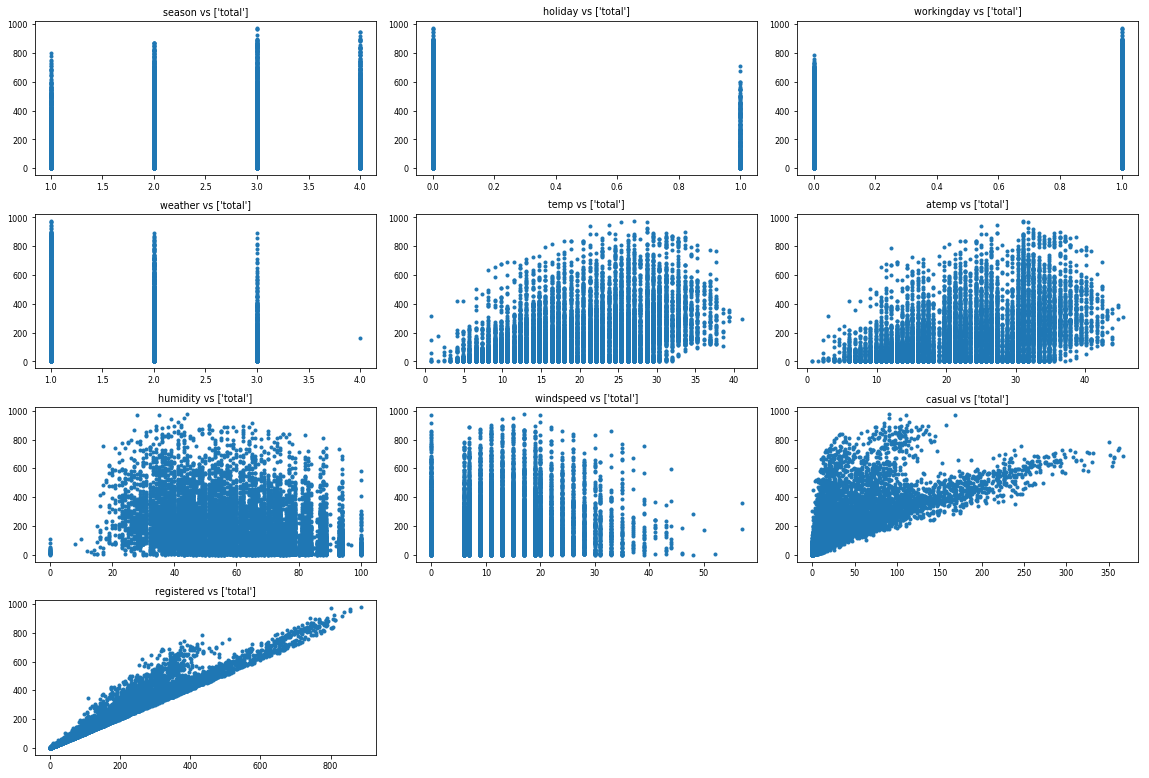

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


In [6]:
(continuous_vars ,categorical_vars,predictor_column,
 feature_columns,input_dataset ) = load_dataset(TRAINFILE,PREDICTOR)
y=input_dataset[predictor_column]
X=input_dataset.drop(predictor_column,axis=1)
plot_dataset(X,y,feature_columns,predictor_column)
bikes_dataset = transform_dataset(continuous_vars ,categorical_vars,input_dataset)
pd.crosstab(bikes_dataset['season'], bikes_dataset.index.month)



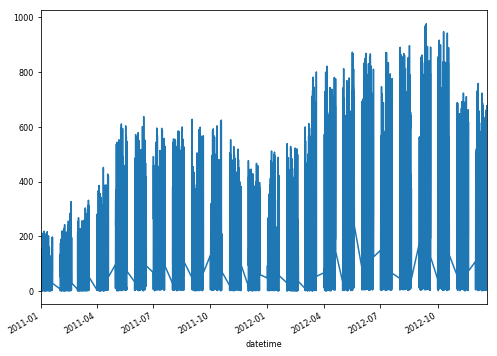

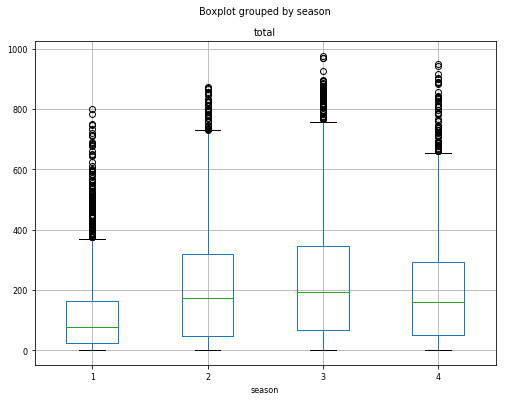

In [7]:
bikes_dataset.total.plot()
bikes_dataset.boxplot(column='total', by='season')

In [8]:
bikes_dataset.corr().sort_values('total',ascending=False)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
total,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655


In [9]:

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# load the iris datasets
 
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.03695745  0.0057181   0.01021752  0.04206586  0.11011574  0.1131764
  0.13491981  0.13683584  0.17391701  0.23607627]


In [10]:
feature_df =pd.DataFrame(data=model.feature_importances_,columns=['importance'],index =feature_columns)
feature_df.sort_values('importance',ascending=False)

,importance
registered,0.236076
casual,0.173917
windspeed,0.136836
humidity,0.134920
atemp,0.113176
temp,0.110116
weather,0.042066
season,0.036957
workingday,0.010218
holiday,0.005718


In [17]:
features=['temp','season', 'weather', 'humidity']
y=bikes_dataset[predictor_column]
X=bikes_dataset [features]

print(y[0:5])
print(X.head().to_string())
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
bikes_lr =LinearRegression()
bikes_lr.fit(X,y)
# print the coefficients
print (bikes_lr.intercept_)
print (bikes_lr.coef_)
 

                     total
datetime                  
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                     temp  season  weather  humidity
datetime                                            
2011-01-01 00:00:00  9.84       1        1        81
2011-01-01 01:00:00  9.02       1        1        80
2011-01-01 02:00:00  9.02       1        1        80
2011-01-01 03:00:00  9.84       1        1        75
2011-01-01 04:00:00  9.84       1        1        75
[ 159.52068786]
[[  7.86482499  22.53875753   6.67030204  -3.11887338]]


In [23]:
(continuous_vars ,categorical_vars,predictor_column,
 feature_columns,input_dataset ) = load_dataset(TESTFILE,PREDICTOR)
bikes_dataset = transform_dataset(continuous_vars ,categorical_vars,input_dataset)
y=bikes_dataset[predictor_column]
X=bikes_dataset [features]
y_pred =bikes_lr.predict(X)
bikes_dataset['y_pred']=y_pred
print(bikes_dataset.head(15).to_string())

 input file is :F:\DataSource\bike_sharing\test.csv loaded.
Continous Variables
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed'],
      dtype='object')
No categorical variables
[]
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6493 entries, 2011-01-20 00:00:00 to 2012-12-31 23:00:00
Data columns (total 8 columns):
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5)
memory usage: 456.5 KB
None
                     season  holiday  workingday  weather   temp   atemp  humidity  windspeed      y_pred
datetime                                                                                       